In [2]:
import requests
import json
import concurrent.futures
import matplotlib.pyplot as plt

In [195]:
redisChargeUrl = 'https://6flvfinpb7.execute-api.us-east-1.amazonaws.com/prod/charge-request-redis'
redisResetUrl = 'https://6flvfinpb7.execute-api.us-east-1.amazonaws.com/prod/reset-redis'
memcachedChargeUrl = 'https://pvnm4n5nlc.execute-api.us-east-1.amazonaws.com/prod/charge-request-memcached'
memcachedResetUrl = 'https://pvnm4n5nlc.execute-api.us-east-1.amazonaws.com/prod/reset-memcached'



In [196]:
def plot_distribution(data, cache):
    plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Check Balance Time is ms')
    plt.ylabel('Frequency')
    plt.title('Distribution Chart for '+ cache)
    plt.grid(True)
    plt.show()

def create_pie_chart(data_dict, cache):
    labels = list(data_dict.keys())
    values = list(data_dict.values())

    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Pie Chart of check balance time for '+ cache)
    plt.show()



def testIt(ChargeUrl, resetUrl):

    response = requests.post(ChargeUrl)
    if response.status_code==200:
        if response.json()['isAuthorized']:
            return response.json()['checkBalanceTimeTaken']
        else:
            requests.post(resetUrl)
            return response.json()['checkBalanceTimeTaken']
    else:
        return None
    
finalResultsRedis = []
finalResultsMemcached = []

## Ran the below block about 10-20 times, with a 5 sec break in between to avoid being rate limited

In [261]:


requests.post(redisResetUrl)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(testIt, redisChargeUrl, redisResetUrl) for _ in range(250)]

    for res in concurrent.futures.as_completed(results):
        finalResultsRedis.append(res.result())


In [262]:
finalResultsRedis = [res for res in finalResultsRedis if res is not None]

redisCountDict = {'under 25 ms':0, 'greater than 25 ms': 0}

for res in finalResultsRedis:
    if res<=25:
        redisCountDict['under 25 ms']+=1
    else:
        redisCountDict['greater than 25 ms']+=1




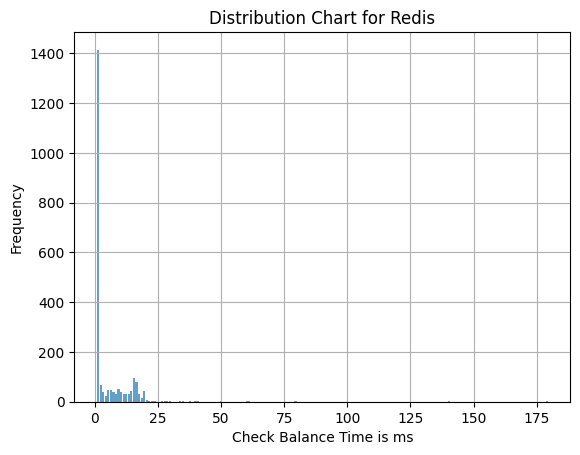

In [263]:
plot_distribution(finalResultsRedis, 'Redis')


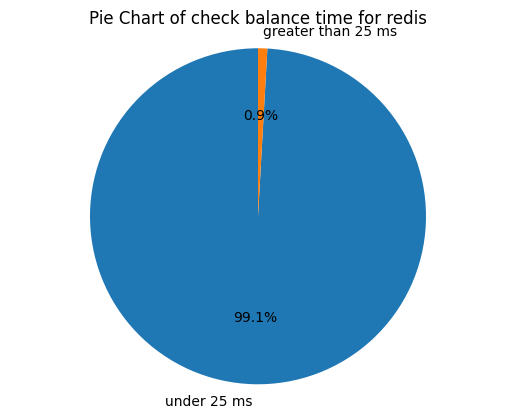

{'under 25 ms': 2224, 'greater than 25 ms': 20}


In [264]:
create_pie_chart(redisCountDict,'redis')
print(redisCountDict)

## Ran the below block about 10-20 times, with a 5 sec break in between to avoid being rate limited

In [265]:


requests.post(memcachedResetUrl)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(testIt, memcachedChargeUrl, memcachedResetUrl) for _ in range(250)]

    for res in concurrent.futures.as_completed(results):
        finalResultsMemcached.append(res.result())

In [266]:
finalResultsMemcached = [res for res in finalResultsMemcached if res is not None]
memcachedCountDict = {'under 25 ms':0, 'greater than 25 ms': 0}

for res in finalResultsMemcached:
    if res<=25:
        memcachedCountDict['under 25 ms']+=1
    else:
        memcachedCountDict['greater than 25 ms']+=1



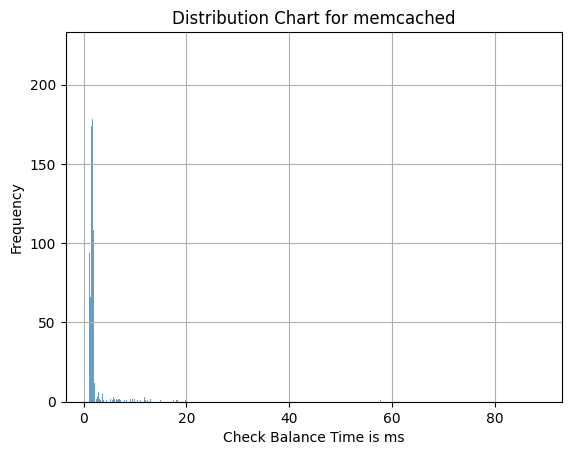

In [267]:
plot_distribution(finalResultsMemcached, 'memcached')


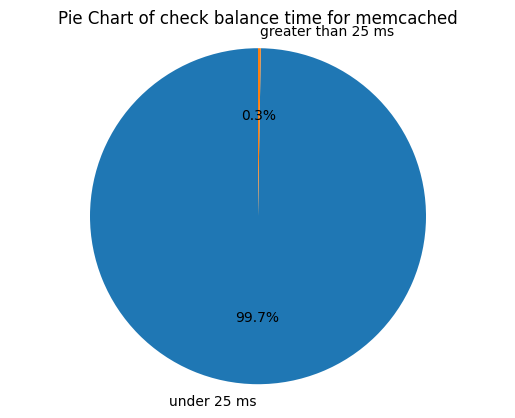

{'under 25 ms': 2243, 'greater than 25 ms': 6}


In [268]:
create_pie_chart(memcachedCountDict,'memcached')
print(memcachedCountDict)